In [23]:
# Plotting
import matplotlib.pyplot as plt

# Data manipulation
import pandas as pd
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error

# Regressors
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import MultiOutputRegressor

In [7]:
data = pd.read_csv('./nyc-rolling-sales-clean-1.csv', sep=";")
data.head()

,Land_sqf,Gross_sqf,Year_built,NBH_level,SALE_PRICE,YEARLY_RENT
0,2400,1552,1930,2,220485,10900
1,2742,1207,1925,2,223372,8100
2,5610,1320,1910,5,362981,19000
3,1758,1537,1910,5,245135,9700
4,1317,1339,1920,4,216477,12800


In [19]:
# Our features and labels
features = ['Land_sqf', 'Gross_sqf', 'Year_built', 'NBH_level']
labels = ['SALE_PRICE', 'YEARLY_RENT']

X = data[features].values
y = data[labels].values

291


In [15]:
# Training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [20]:
# Estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=4, random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "Random Forest Regressor": RandomForestRegressor(max_depth=4, random_state=2),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR": MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB": MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
}

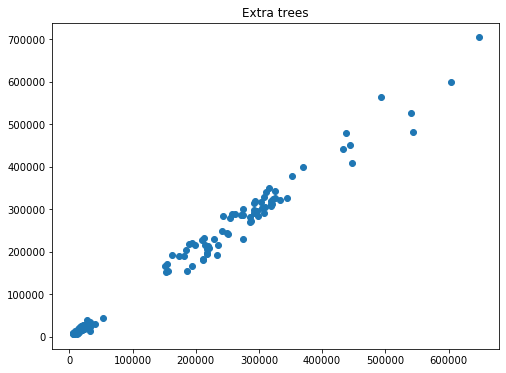

RMSE for  Extra trees  is  292781222.07116425


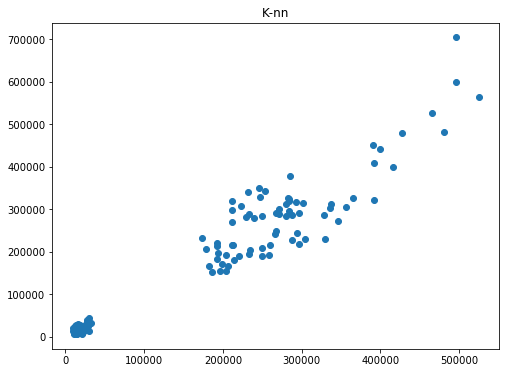

RMSE for  K-nn  is  1637934080.8706849


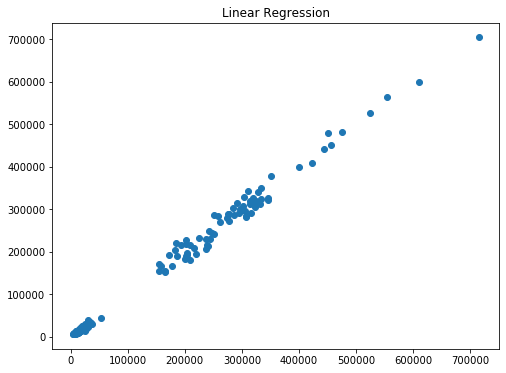

RMSE for  Linear Regression  is  143306817.19939187


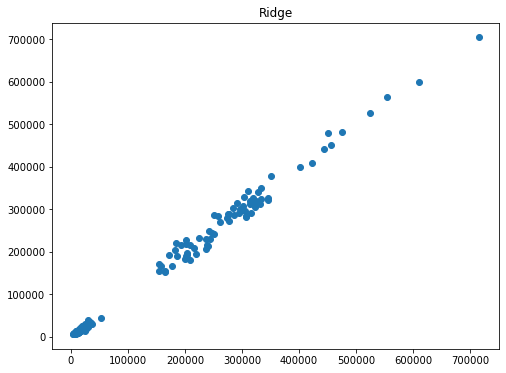

RMSE for  Ridge  is  143300529.31605053


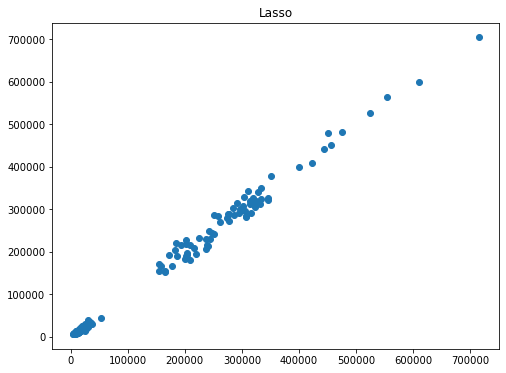

RMSE for  Lasso  is  143306686.33436275


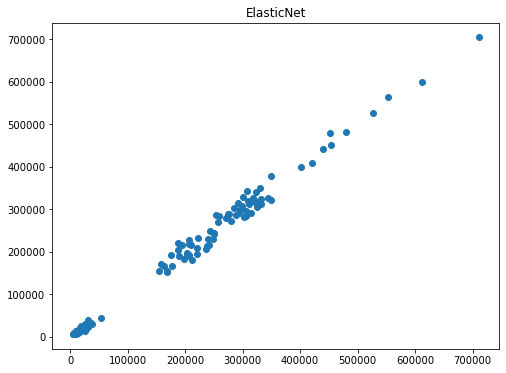

RMSE for  ElasticNet  is  146087372.4240467


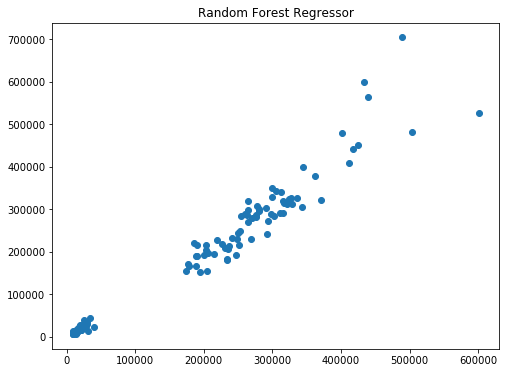

RMSE for  Random Forest Regressor  is  1033539075.4473088


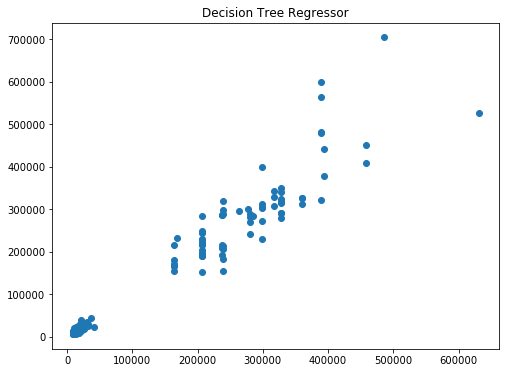

RMSE for  Decision Tree Regressor  is  1681838711.0879905


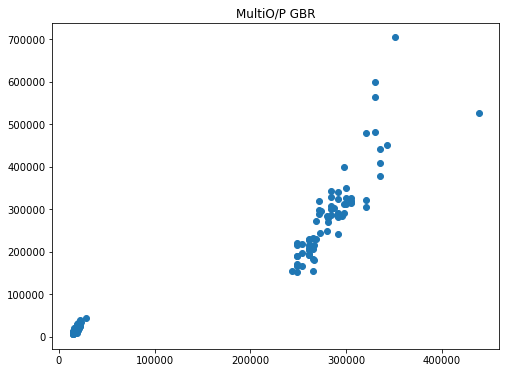

RMSE for  MultiO/P GBR  is  3324331538.236939


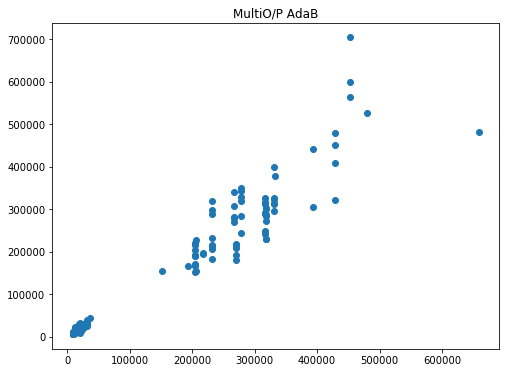

RMSE for  MultiO/P AdaB  is  1879917463.0678377


In [28]:
# Prediction values
y_validation_predict = dict()
y_mse = dict()

for name, estimator in ESTIMATORS.items():
    estimator.fit(train_X, train_y)
    y_validation_predict[name] = estimator.predict(val_X)
    y_mse[name] = mean_squared_error(val_y, estimator.predict(val_X))
    plt.figure(figsize=(8,6))
    plt.scatter(y_validation_predict[name], val_y, cmap='plasma')
    plt.title(name)
    plt.show()
    print('RMSE for ',name,' is ',y_mse[name])